In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.width', 1000)

In [2]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df
    
def filter_with_threshold(df, column_name, threshold):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [3]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

## Datasets for virus-host prediction in Non-IDV dataset
Create a dataset of non-idv viruses with hosts that are present in the idv dataset. Else the only overlap with the top-5 hosts in the previous case was "Homo sapiens"


### Non Immunodeficiency Virus, hosts with >= 0.05% prevalence in the dataset

In [4]:
non_idv_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_gte_0.05_prcnt_prevalence.csv")
non_idv_df = pd.read_csv(non_idv_file_path)
non_idv_df.shape

(42947, 11)

In [5]:
np.percentile(non_idv_df["seq_len"].values, [90, 95, 99.9])

array([ 591.,  841., 3953.])

In [6]:
non_idv_seq_len_filtered_df = non_idv_df[non_idv_df["seq_len"] <= 3953]
#non_idv_seq_len_filtered_df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_gte_0.05_prcnt_prevalence_seqlen_lte_99prcntile.csv"), index=False)

In [7]:
column_stats(non_idv_seq_len_filtered_df, "virus_name")

Number of unique values = 2342
                         virus_name  virus_name_count  virus_name_percent
0               Hepacivirus hominis             10939           25.495863
1                 Hepatitis B virus             10126           23.600979
2              Human papillomavirus              1078            2.512528
3                       Rotavirus A               683            1.591889
4             Marmot picobirnavirus               529            1.232957
...                             ...               ...                 ...
2337  Picobirnavirus PREDICT_PbV-27                 1            0.002331
2338  Picobirnavirus PREDICT_PbV-38                 1            0.002331
2339  Picobirnavirus PREDICT_PbV-69                 1            0.002331
2340  Picobirnavirus PREDICT_PbV-93                 1            0.002331
2341                Hunnivirus 05VZ                 1            0.002331

[2342 rows x 3 columns]


,virus_name,virus_name_count,virus_name_percent
0,Hepacivirus hominis,10939,25.495863
1,Hepatitis B virus,10126,23.600979
2,Human papillomavirus,1078,2.512528
3,Rotavirus A,683,1.591889
4,Marmot picobirnavirus,529,1.232957
...,...,...,...
2337,Picobirnavirus PREDICT_PbV-27,1,0.002331
2338,Picobirnavirus PREDICT_PbV-38,1,0.002331
2339,Picobirnavirus PREDICT_PbV-69,1,0.002331
2340,Picobirnavirus PREDICT_PbV-93,1,0.002331


In [8]:
column_stats(non_idv_seq_len_filtered_df, "virus_host_name")

Number of unique values = 148
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 Homo sapiens                  28772                67.059783
1                   Sus scrofa                   1284                 2.992658
2    Hydrochoerus hydrochaeris                    627                 1.461368
3           Marmota himalayana                    539                 1.256264
4                Gallus gallus                    482                 1.123412
..                         ...                    ...                      ...
143           Cairina moschata                     24                 0.055938
144                Salmo salar                     24                 0.055938
145              Rattus rattus                     24                 0.055938
146              Anas gracilis                     24                 0.055938
147              Python regius                     23                 0.053607

[148 rows x 3 columns

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,28772,67.059783
1,Sus scrofa,1284,2.992658
2,Hydrochoerus hydrochaeris,627,1.461368
3,Marmota himalayana,539,1.256264
4,Gallus gallus,482,1.123412
...,...,...,...
143,Cairina moschata,24,0.055938
144,Salmo salar,24,0.055938
145,Rattus rattus,24,0.055938
146,Anas gracilis,24,0.055938


In [9]:
non_idv_hosts = set(non_idv_df["virus_host_name"].unique())
np.savetxt(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_non_idv_hosts.csv"),
          non_idv_df["virus_host_name"].unique(),
          fmt="%s")
print(len(non_idv_hosts))
non_idv_hosts

148


{'Acanthorhynchus tenuirostris',
 'Acinonyx jubatus',
 'Aegithalos caudatus',
 'Ailuropoda melanoleuca',
 'Ailurus fulgens',
 'Alces alces',
 'Amazona oratrix',
 'Ambystoma tigrinum',
 'Anas castanea',
 'Anas gracilis',
 'Anas platyrhynchos',
 'Anas superciliosa',
 'Anguilla australis',
 'Apodemus agrarius',
 'Apodemus flavicollis',
 'Arctocephalus australis',
 'Arctocephalus tropicalis',
 'Boa constrictor',
 'Bos taurus',
 'Bufo bufo',
 'Cairina moschata',
 'Callorhinus ursinus',
 'Camelus dromedarius',
 'Capra hircus',
 'Cavia porcellus',
 'Cecropis daurica',
 'Chelonia mydas',
 'Chenonetta jubata',
 'Coendou prehensilis',
 'Corynorhinus rafinesquii',
 'Crocodilurus amazonicus',
 'Crocodylus porosus',
 'Cygnus columbianus',
 'Cyprinus carpio',
 'Dendrocopos leucotos',
 'Desmodus rotundus',
 'Dipodomys merriami',
 'Eidolon helvum',
 'Elephas maximus',
 'Emberiza chrysophrys',
 'Emberiza spodocephala',
 'Enhydra lutris',
 'Eptesicus fuscus',
 'Eptesicus serotinus',
 'Equus asinus',
 'E

### Immunodeficiency virus dataset

In [10]:
idv_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
idv_df = pd.read_csv(idv_file_path)
idv_df.shape

(220068, 11)

In [11]:
column_stats(idv_df, "virus_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/metadata/uniref90_viridae_embl_hosts_pruned_species_vertebrates_idv_virus.csv"))

Number of unique values = 7
                            virus_name  virus_name_count  virus_name_percent
0       Human immunodeficiency virus 1            215415           97.885654
1         Human immunodeficiency virus              2095            0.951978
2  Simian-Human immunodeficiency virus              1030            0.468037
3       Human immunodeficiency virus 2               788            0.358071
4        Simian immunodeficiency virus               538            0.244470
5        Feline immunodeficiency virus               198            0.089972
6        Bovine immunodeficiency virus                 4            0.001818


In [15]:
column_stats(idv_df, "virus_host_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/metadata/uniref90_viridae_embl_hosts_pruned_species_vertebrates_idv_virus_host.csv"))
idv_column_stats = column_stats(idv_df, "virus_host_name")

Number of unique values = 40
                       virus_host_name  virus_host_name_count  virus_host_name_percent
0                         Homo sapiens                 218631                99.347020
1                       Macaca mulatta                    849                 0.385790
2                          Felis catus                    143                 0.064980
3                      Cercocebus atys                    122                 0.055437
4                        Puma concolor                     24                 0.010906
5                    Macaca nemestrina                     23                 0.010451
6                    Mandrillus sphinx                     23                 0.010451
7               Mandrillus leucophaeus                     20                 0.009088
8              Cercopithecus nictitans                     19                 0.008634
9                Cercopithecus solatus                     17                 0.007725
10            

In [12]:
idv_hosts = set(idv_df["virus_host_name"].unique())
np.savetxt(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_idv_hosts.csv"),
           idv_df["virus_host_name"].unique(), 
           fmt="%s")
print(len(idv_hosts))
idv_hosts

40


{'Bos taurus',
 'Cercocebus atys',
 'Cercocebus torquatus',
 'Cercocebus torquatus atys',
 'Cercopithecus aethiops',
 'Cercopithecus aethiops pygerythrus',
 'Cercopithecus ascanius',
 'Cercopithecus cephus',
 'Cercopithecus erythrotis',
 'Cercopithecus lhoesti',
 'Cercopithecus mitis',
 'Cercopithecus mona',
 'Cercopithecus neglectus',
 'Cercopithecus nictitans',
 'Cercopithecus solatus',
 'Chlorocebus pygerythrus',
 'Chlorocebus sabaeus',
 'Chlorocebus tantalus',
 'Colobus guereza',
 'Felis catus',
 'Felis domesticus',
 'Felis silvestris catus',
 'Homo sapiens',
 'Lynx rufus',
 'Macaca arctoides',
 'Macaca fascicularis',
 'Macaca mulatta',
 'Macaca nemestrina',
 'Mandrillus leucophaeus',
 'Mandrillus sphinx',
 'Miopithecus ogouensis',
 'Otocolobus manul',
 'Panthera leo',
 'Panthera pardus',
 'Papio ursinus',
 'Piliocolobus badius',
 'Piliocolobus tephrosceles',
 'Procolobus verus',
 'Puma concolor',
 'Semnopithecus entellus'}

### Intersection between Non-IDV and IDV virus hosts

In [13]:
print(f"non_idv virus hosts = {len(non_idv_hosts)}")
print(f"idv virus hosts = {len(idv_hosts)}")
print(f"non_idv minus idv virus hosts = {len(non_idv_hosts - idv_hosts)}")
print(f"idv minus non_idv virus hosts = {len(idv_hosts - non_idv_hosts)}")
print(f"non_idv intersection idv virus hosts = {len(non_idv_hosts.intersection(idv_hosts))}")
print(f"non_idv union idv virus hosts = {len(non_idv_hosts.union(idv_hosts))}")

non_idv virus hosts = 148
idv virus hosts = 40
non_idv minus idv virus hosts = 140
idv minus non_idv virus hosts = 32
non_idv intersection idv virus hosts = 8
non_idv union idv virus hosts = 180


#### Unseen virus, seen hosts: Virus hosts in IDV and in Non-IDV and their prevalence in IDV dataset

In [16]:
idv_column_stats[idv_column_stats["virus_host_name"].isin(list(non_idv_hosts.intersection(idv_hosts)))]

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,218631,99.347020
1,Macaca mulatta,849,0.385790
2,Felis catus,143,0.064980
6,Mandrillus sphinx,23,0.010451
24,Felis domesticus,5,0.002272
25,Macaca arctoides,5,0.002272
26,Macaca fascicularis,5,0.002272
28,Bos taurus,4,0.001818


In [23]:
sub_idv_df = idv_df[idv_df["virus_host_name"].isin(non_idv_hosts.intersection(idv_hosts))]
print(sub_idv_df.shape)
sub_idv_df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_seen_hosts.csv"), index=False)

(219665, 11)


min seq len = 11
max seq len = 1450


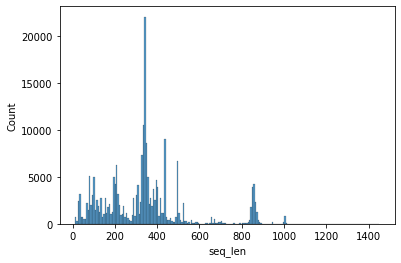

          start          end  count  percentage
0     11.000000   130.916667  35244   16.044431
1    130.916667   250.833333  39985   18.202718
2    250.833333   370.750000  75515   34.377347
3    370.750000   490.666667  35869   16.328955
4    490.666667   610.583333  13275    6.043293
5    610.583333   730.500000   2906    1.322924
6    730.500000   850.416667   4422    2.013065
7    850.416667   970.333333  11258    5.125077
8    970.333333  1090.250000   1188    0.540824
9   1090.250000  1210.166667      1    0.000455
10  1210.166667  1330.083333      0    0.000000
11  1330.083333  1450.000000      2    0.000910


In [24]:
print_seq_len_histogram(sub_idv_df, 12)

#### Unseen virus, unseen hosts: Virus hosts in IDV but NOT in Non-IDV and their prevalence in IDV dataset

In [25]:
print(len(list(idv_hosts - non_idv_hosts)))
idv_column_stats[idv_column_stats["virus_host_name"].isin(list(idv_hosts - non_idv_hosts))]

32


,virus_host_name,virus_host_name_count,virus_host_name_percent
3,Cercocebus atys,122,0.055437
4,Puma concolor,24,0.010906
5,Macaca nemestrina,23,0.010451
7,Mandrillus leucophaeus,20,0.009088
8,Cercopithecus nictitans,19,0.008634
9,Cercopithecus solatus,17,0.007725
10,Cercocebus torquatus,16,0.007270
11,Cercopithecus aethiops,14,0.006362
12,Cercopithecus cephus,13,0.005907
13,Chlorocebus sabaeus,13,0.005907


In [26]:
sub_idv_df = idv_df[idv_df["virus_host_name"].isin(idv_hosts - non_idv_hosts)]
print(sub_idv_df.shape)
sub_idv_df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_unseen_hosts.csv"), index=False)

(403, 11)


min seq len = 14
max seq len = 1443


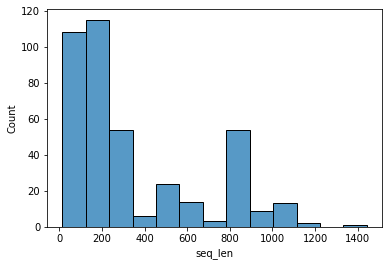

          start          end  count  percentage
0     14.000000   133.083333    128   31.761787
1    133.083333   252.166667    114   28.287841
2    252.166667   371.250000     37    9.181141
3    371.250000   490.333333      6    1.488834
4    490.333333   609.416667     30    7.444169
5    609.416667   728.500000      7    1.736973
6    728.500000   847.583333      8    1.985112
7    847.583333   966.666667     56   13.895782
8    966.666667  1085.750000     14    3.473945
9   1085.750000  1204.833333      2    0.496278
10  1204.833333  1323.916667      0    0.000000
11  1323.916667  1443.000000      1    0.248139


In [27]:
print_seq_len_histogram(sub_idv_df, 12)